In [1]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.model_selection import cross_val_score
import sys 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
import pandas

In [19]:
dataset = pandas.read_csv('../dataset_norm.csv', delimiter=',').sort_values(by='move_type')

In [20]:
dataset.head()

,move_type,d_0,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,...,d_-10,d_-9,d_-8,d_-7,d_-6,d_-5,d_-4,d_-3,d_-2,d_-1
150,GO,2.170722e-16,1,0.384187,0.208813,0.216921,0.038474,0.110350,0.082350,0.097247,...,0.009643,0.048340,0.023341,0.128363,0.092402,0.060743,0.192700,0.030283,0.082370,0.066994
206,GO,1.849303e-16,1,0.318827,0.142795,0.089916,0.028816,0.116524,0.096799,0.066367,...,0.038999,0.037991,0.031443,0.057793,0.117156,0.110077,0.142238,0.076322,0.082293,0.120068
205,GO,2.640244e-16,1,0.252896,0.102374,0.027737,0.034839,0.062714,0.102908,0.059627,...,0.040863,0.019640,0.059791,0.043802,0.119923,0.051821,0.097050,0.069223,0.102702,0.170406
204,GO,2.730378e-16,1,0.327660,0.102242,0.027937,0.032844,0.111945,0.120641,0.036026,...,0.017423,0.021744,0.040593,0.011396,0.154387,0.088928,0.064369,0.077308,0.095720,0.182527
203,GO,3.719606e-16,1,0.357169,0.143961,0.071896,0.071706,0.130099,0.074283,0.085000,...,0.005645,0.004887,0.047136,0.067699,0.116815,0.142041,0.080959,0.091715,0.048963,0.155147


In [4]:
labels = dataset['move_type']

columns = [item for item in list(dataset.columns) if item!='move_type']
features = dataset[columns]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features.values, labels.values, test_size=0.33, random_state=42)

# K-Means clustering

In [6]:
n_clusters = 134
score = []
validation = []
for i in range(2,n_clusters):
    
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_train)
    score.append(kmeans.score(X_test, y_test))
    validation.append(kmeans.score(X_train, y_train))


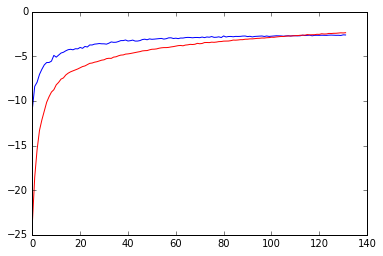

In [7]:
plt.plot(score)
plt.plot(validation, 'r')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=100, random_state=0, max_iter=10000).fit(X_train)

In [9]:
kmeans.cluster_centers_.shape

(100, 41)

In [10]:
belong_to = kmeans.predict(features.values)
print(belong_to[:49])
print(belong_to[50:99])
print(belong_to[100:149])
print(belong_to[150:199])

[74 15 90 55 77 71 77 74  1 73 73 73 73 51 51 71 15 15 55 77 77 77 58 12 93
 93 77 93 74 50 12 77 12 42 51 93 78 51 47 77 77 89 89 78 12 33 74 74 77]
[51 28 33 42 77 14 58 21 21 21 61 51 14 21 51 51 21 14 32 14 32 14 82 77 15
  8 94 15 15 58 86 94 86 67 67 67 67 60  8 50 15 50 50 61 78 51 21 21 61]
[78 61 78 78 61 61 21 61 60 77 19 50 12 58 58 89 55 58 15 15 78 93 55  1 93
  1 58 81 81 90 67 91 67 91 91 93 12 12  1 12 58 58 78 77 15 12 74 21 74]
[12 12 12 12 12 12 15 28  1 12 93 47 12 47 47 51 47 47 89 75 60 66 42 12 73
 28 15 94 12 19 19 19 67 67 91 91 60 91 91 58 90 60 60 15 50 86 93  8  8]


In [11]:
def reconstruct(descriptors):
    """ reconstruct the image using the normalized descriptors and plot it
        Keyword arguments: 
         - descriptors : the normalized fourier descriptors
    """
    contour_reconstruct = np.fft.ifft(descriptors)
    contour_reconstruct = np.array(
        [contour_reconstruct.real, contour_reconstruct.imag])
    contour_reconstruct = np.transpose(contour_reconstruct)
    contour_reconstruct = np.expand_dims(contour_reconstruct, axis=1)
    # make positive
    if contour_reconstruct.min() < 0:
        contour_reconstruct -= contour_reconstruct.min()
    # normalization
    contour_reconstruct *= 800 / contour_reconstruct.max()
    # type cast to int32
    contour_reconstruct = contour_reconstruct.astype(np.int32, copy=False)
    black = np.zeros((800, 800), np.uint8)
    # draw and visualize
    cv2.drawContours(black, contour_reconstruct, -1, 255, thickness=-1)
    cv2.imshow("black", black)
    cv2.waitKey(10000)
    cv2.imwrite("reconstruct_result.jpg", black)
    cv2.destroyAllWindows()

### To run if dataset and not dataset norm 

In [12]:
img_nb = 60
complex_descriptors = []
for i in range(int(len(features.values[img_nb])/2)):
    complex_descriptors.append(complex(features.values[img_nb][2*i], features.values[img_nb][2*i+1]))
reconstruct(complex_descriptors)
labels[3]

'GO'

In [13]:
plt.scatter(X_test[7][3::2],X_test[7][2::2] )
plt.scatter(centers[1, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
plt.show()

ValueError: x and y must be the same size

# KNN clustering

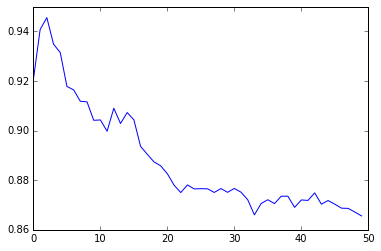

In [21]:
# creating odd list of K for KNN
myList = list(range(1,100))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
plt.plot(cv_scores)
plt.show()

In [22]:
knn_classifier = KNeighborsClassifier(n_neighbors=14, weights='distance').fit(X_train,y_train ) 

In [23]:
knn_belong_to = knn_classifier.predict(features.values)

In [24]:
test_prediction = knn_classifier.predict(X_test)

In [25]:
missclassified = 0
for i in range(len(y_test)):
    if y_test[i] != test_prediction[i]: 
        missclassified = missclassified +1
print(missclassified)

27


## Feedforward Neural Network 

In [26]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs',
                     hidden_layer_sizes=(41), random_state=1, 
                     max_iter = 10000, early_stopping=True)

clf.fit(X_train,y_train)                         
test_fnn_prediction = clf.predict(X_test)
test_fnn_overfit = clf.predict(X_train)

In [27]:
count = 0
for i in range(len(y_test)):
    if y_test[i] != test_fnn_prediction[i]: 
        print("{} missclassified as {}".format(y_test[i], test_fnn_prediction[i]))
        count +=1
        
print(count/len(y_test)*100)


LEFT missclassified as RIGHT
RIGHT missclassified as LEFT
RIGHT missclassified as LEFT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
RIGHT missclassified as LEFT
LEFT missclassified as RIGHT
RIGHT missclassified as LEFT
RIGHT missclassified as LEFT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
RIGHT missclassified as LEFT
RIGHT missclassified as LEFT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
RIGHT missclassified as LEFT
LEFT missclassified as RIGHT
RIGHT missclassified as LEFT
LEFT missclassified as RIGHT
STOP missclassified as RIGHT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
LEFT missclassified as RIGHT
7.716049382716049


In [28]:
for i in range(len(y_train)):
    if y_train[i] != test_fnn_overfit[i]: 
        print("{} missclassified as {}".format(y_train[i], test_fnn_overfit[i]))
        count +=1
        
print(count/len(y_train)*100)

3.8109756097560976
